In [72]:
#Import libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [73]:
# Load the dataset
df = pd.read_csv('train.csv')
df1 = pd.read_csv('train.csv')
df.shape 


(1460, 81)

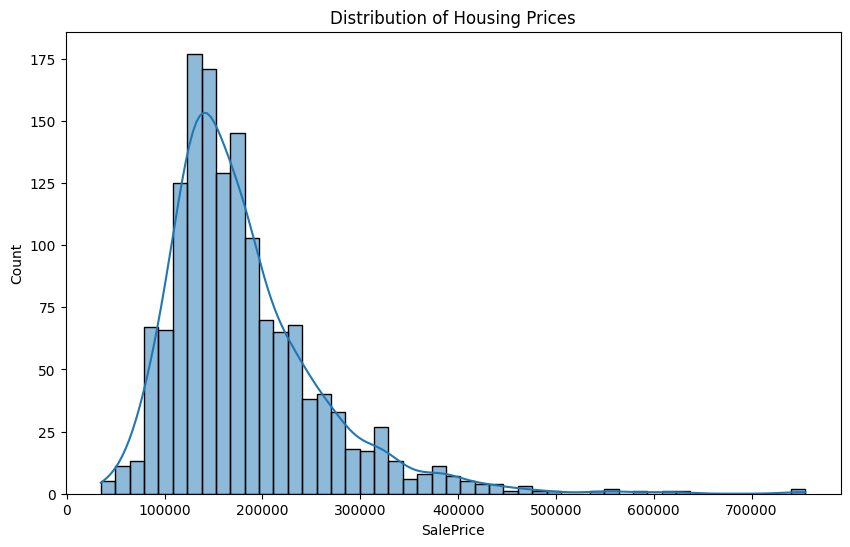

In [74]:
# Visualize the distribution of house prices
plt.figure(figsize=(10,6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of Housing Prices')
plt.show()

In [81]:
# Drop columns with too many missing values
#df = df.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'])
df = df.drop(columns=df.select_dtypes(include=['object']).columns)

In [ ]:
df.info()

In [83]:
# Fill missing values for numerical columns with the median
df.fillna(df.median(), inplace=True)

In [84]:
# Encode categorical columns using one-hot encoding
df = pd.get_dummies(df)

In [85]:
# Split the data into features and target variable
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

In [86]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
#Scaling the features: Standardize the features to improve model performance.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [88]:
#Train a Linear Regression Model: Train the model using Linear Regression.

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [89]:
#Make Predictions: Use the trained model to predict housing prices.

y_pred = model.predict(X_test_scaled)

In [93]:
y_pred

array([153574.74149521, 309014.80313642, 112823.39203523, 180493.70376046,
       294975.14319676,  50918.6977091 , 233715.90763683, 147792.41915058,
        48684.57933506, 149624.57468533, 153077.30205177, 113898.21372658,
        75354.94415725, 212665.21560604, 187756.06397547, 141272.91376935,
       213140.13952267, 137011.69260156, 114779.25702429, 235383.17713374,
       182360.03000785, 210999.9222002 , 190370.46091715, 129883.11895111,
       211621.00677411, 151036.10484857, 198358.41328079,  77702.95587218,
       178814.1589035 , 182532.94482456, 118561.43721384, 271890.51215128,
       225188.94746024,  88917.44993817, 266196.51008847, 159755.23334623,
       148204.72240895, 217680.6744909 , 304145.30033568,  88360.21246538,
       137171.50285633, 249678.65991124, 105538.6306581 , 275210.08985869,
       128751.59012429, 126474.42823228, 103353.04955422, 131575.87116645,
       360561.03149361, 128087.54406236, 107044.48064477, 214587.79740111,
        89044.05579073, 3

In [90]:
#Evaluate the Model: Evaluate the model’s performance using metrics like Mean Absolute Error (MAE) and Mean Squared Error (MSE).
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [91]:
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 23013.011434627188
Mean Squared Error: 1362381878.0384362
Root Mean Squared Error: 36910.45757015803
